In [188]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Data collection and Analysis

In [190]:
#importing dataset into notebook as pandas dataframe using Pandas library
insurance_dataset=pd.read_csv("insurance.csv")

In [191]:
#the first five rows of the insurance dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [192]:
#number of rows and columns present in the dataframe
insurance_dataset.shape

(1338, 7)

### The Insurance Dataset contains 1338 rows and 7 columns

In [194]:
#details about the dataframe 
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### categorical features are:
####     -sex
####     -smoker
####     -region

In [196]:
#checking for any missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [198]:
#check some statistical measures of the data
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 800x800 with 0 Axes>

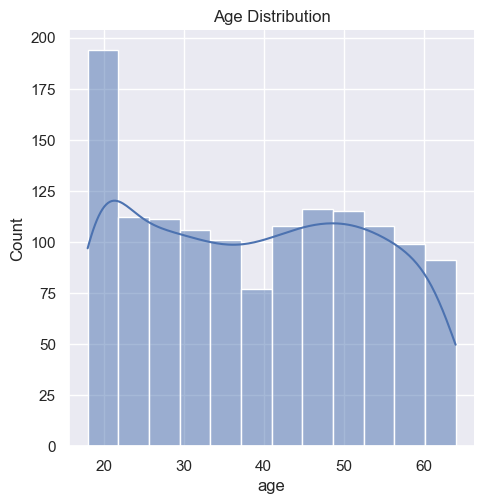

In [199]:
#checking the distribution of age.`
sns.set()
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['age'],kde=True)
plt.title("Age Distribution")
plt.show()

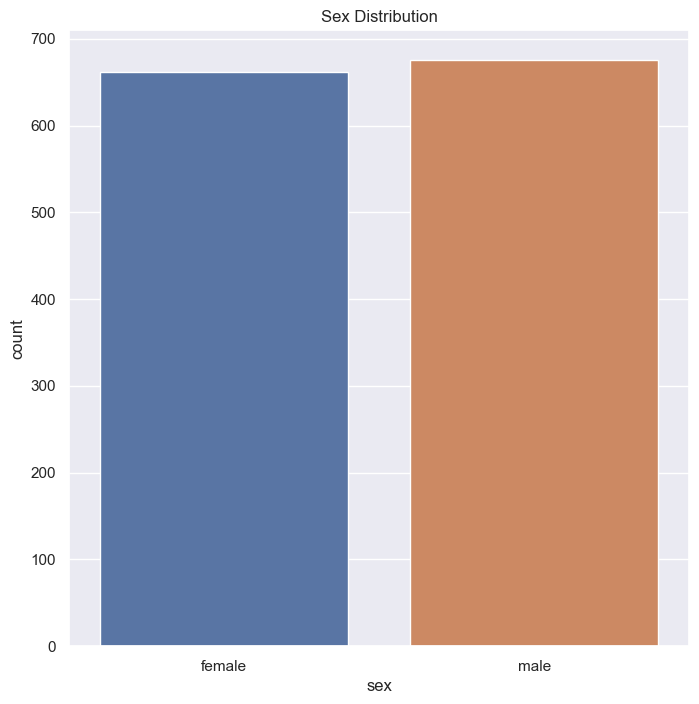

In [200]:
plt.figure(figsize=(8,8))
sns.countplot(data=insurance_dataset,x='sex')
plt.title("Sex Distribution")
plt.show()

<Figure size 800x800 with 0 Axes>

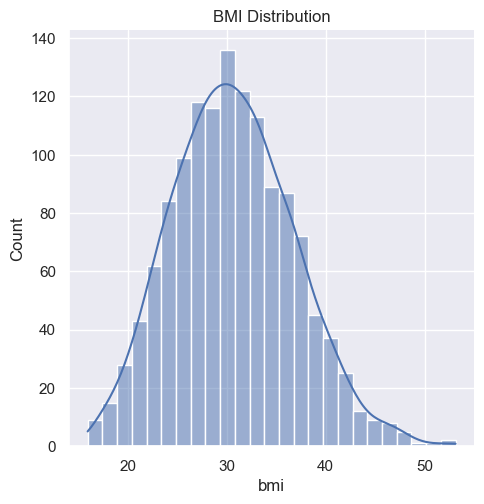

In [201]:
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['bmi'],kde=True)
plt.title("BMI Distribution")
plt.show()

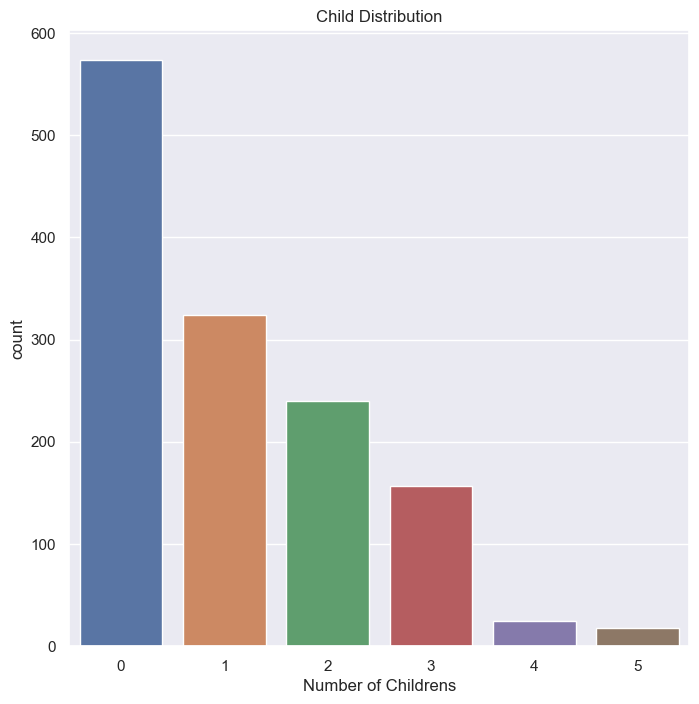

In [202]:
plt.figure(figsize=(8,8))
sns.countplot(data=insurance_dataset,x='children')
plt.title("Child Distribution")
plt.xlabel("Number of Childrens")
plt.show()

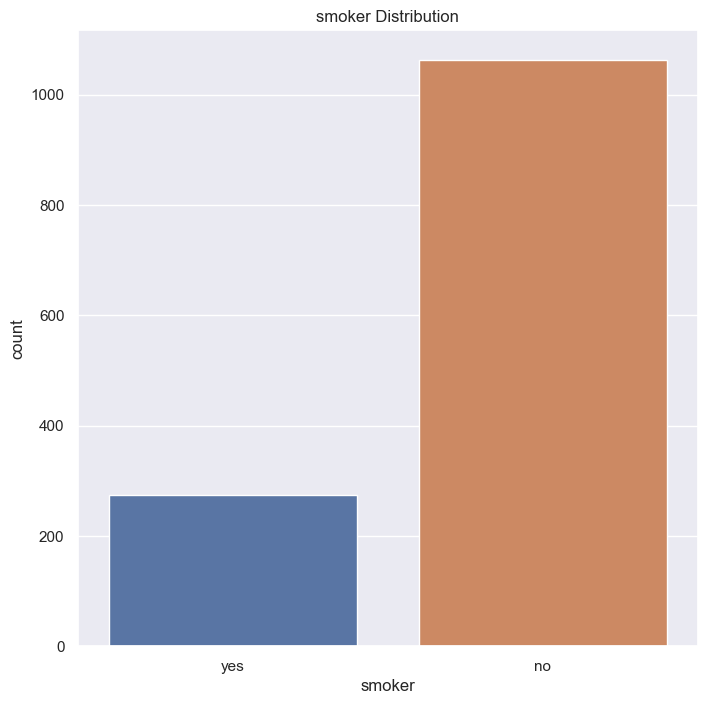

In [203]:
plt.figure(figsize=(8,8))
sns.countplot(data=insurance_dataset,x='smoker')
plt.title("smoker Distribution")
plt.show()

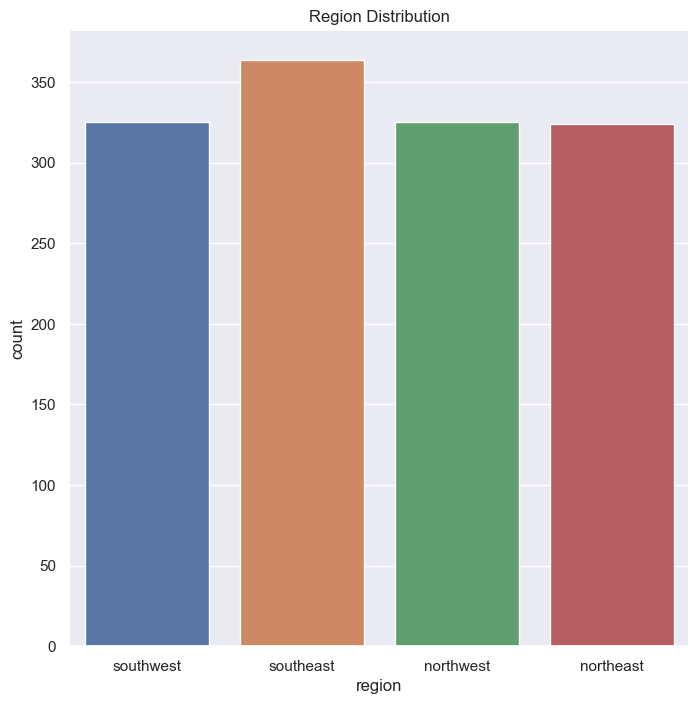

In [204]:
plt.figure(figsize=(8,8))
sns.countplot(data=insurance_dataset,x='region')
plt.title("Region Distribution")
plt.show()

<Figure size 600x600 with 0 Axes>

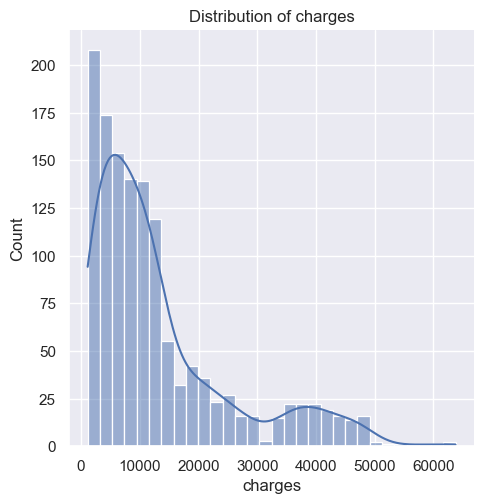

In [205]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'],kde=True)
plt.title("Distribution of charges")
plt.show()

### Data Preprocessing

In [207]:
#Encoding the sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

In [208]:
#Encoding the smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1,}},inplace=True)

In [209]:
#Encoding the region column
insurance_dataset.replace({'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}},inplace=True)

In [210]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


### Splitting dataset into Features & Target

In [212]:
X=insurance_dataset.iloc[:,:-1]
Y=insurance_dataset.iloc[:,-1]

In [213]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [214]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [215]:
#splitting the data into train data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [216]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

### Creating LinearRegression model

In [218]:
#create object linear regression model 
LRmodel=LinearRegression()

In [219]:
#Training the model
LRmodel.fit(X_train,Y_train)

LinearRegression()

### Evaluate model

In [221]:
#first evalute the model for train data
train_predition=LRmodel.predict(X_train)
train_R2_score=metrics.r2_score(Y_train,train_predition)
print("the R2 score for train data is",train_R2_score)

the R2 score for train data is 0.7530732192579026


In [222]:
#first evalute the model for test data
test_predition=LRmodel.predict(X_test)
test_R2_score=metrics.r2_score(Y_test,test_predition)
print("the R2 score for train data is",test_R2_score)

the R2 score for train data is 0.7406256738597918


<Figure size 500x500 with 0 Axes>

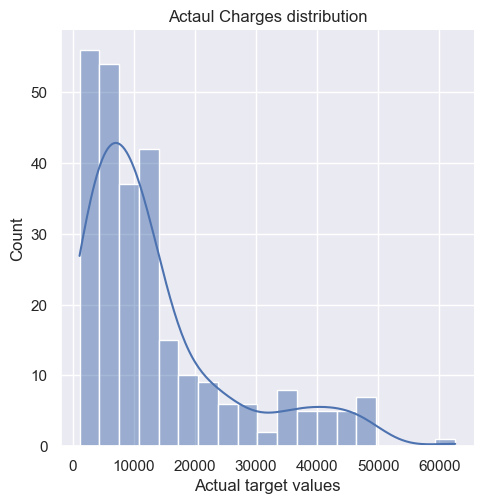

<Figure size 500x500 with 0 Axes>

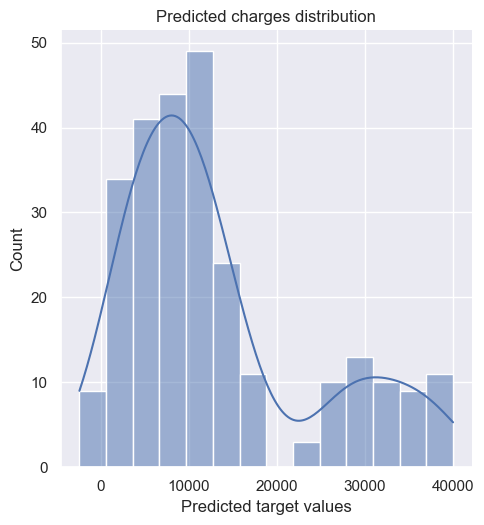

In [223]:
sns.set()
plt.figure(figsize=(5,5))
sns.displot(Y_test,kde=True)
plt.title("Actaul Charges distribution")
plt.xlabel("Actual target values")
plt.show()

plt.figure(figsize=(5,5))
sns.displot(test_predition,kde=True)
plt.title("Predicted charges distribution")
plt.xlabel("Predicted target values")
plt.show()

#### Since the score for train and test is almost near so the model is best fit

### Making Prediction System

In [258]:
#defining a function which will take 1 sample of data and it will predict medical insurance cost.
def MIC_predictor(age, sex, bmi, children, smoker, region):
    if sex == 'male':
        sex=0
    else:
        sex=1
    if smoker == 'yes':
        smoker=0
    else:
        smoker=1
    if region == 'southwest':
        region = 0
    elif region =='southeast':
        region = 1
    elif region == 'northwest':
        region=2
    else:
        region=3
    data=(age, sex, bmi, children, smoker, region)
    data=np.array(data)
    data=data.reshape(1,-1)
    predict=LRmodel.predict(data)
    print("Medical Insurance Cost for the given data is ",predict[0])
    

In [260]:
MIC_predictor(28	,0	,33.000	,3	,1	,1)

Medical Insurance Cost for the given data is  7925.416188586979
